<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/Basics/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d

##Download the dataset

In [0]:
!wget https://github.com/mjypeng/sberbank/raw/master/train.csv.zip
!wget https://github.com/mjypeng/sberbank/raw/master/test.csv.zip

In [0]:
!unzip '/content/test.csv.zip'
!unzip '/content/train.csv.zip'

Archive:  /content/test.csv.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     
Archive:  /content/train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


##Import Dependencies

In [0]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [0]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [0]:
# read the data
df = pd.read_csv('/content/train.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [0]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

In [0]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


##Handling Missing data

###Technique #1: Missing Data Heatmap

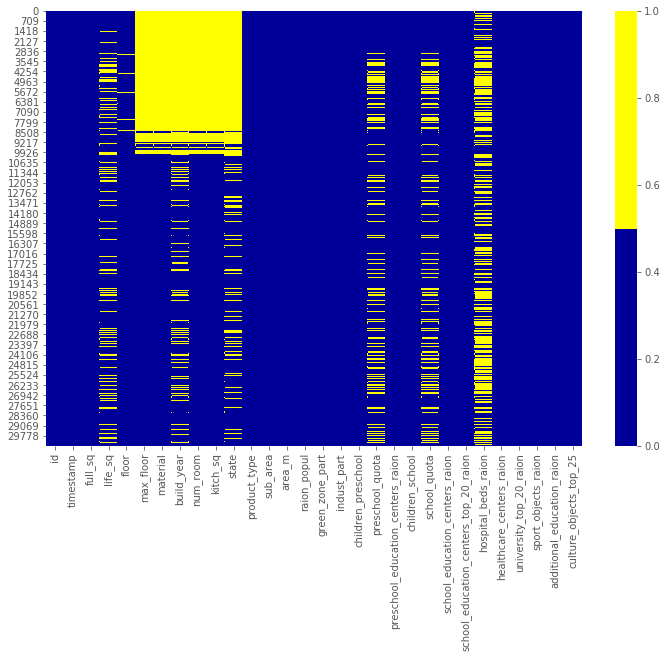

In [0]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

The chart above demonstrates the missing data patterns of the first 30 features. The horizontal axis shows the feature name; the vertical axis shows the number of observations/rows; the yellow color represents the missing data while the blue color otherwise.

###Technique #2: Missing Data Percentage List

In [0]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

Specifically, we see that the life_sq feature has 21% missing, while floor has only 1% missing. This list is a useful summary that can complement the heatmap visualization.

###Technique #3: Missing Data Histogram

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

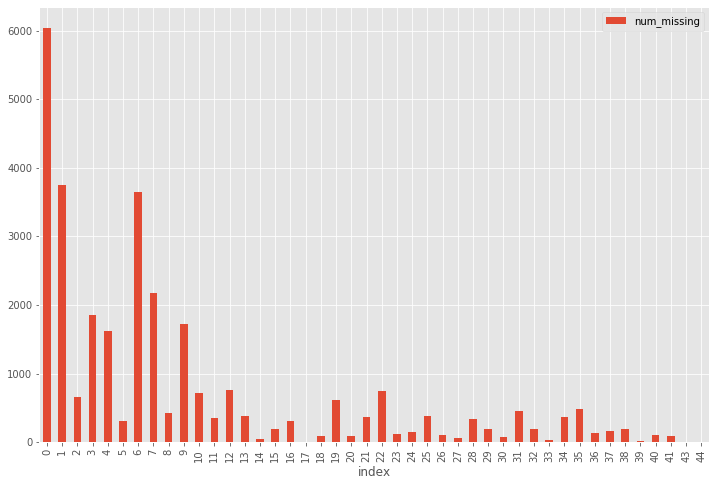

In [0]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


This histogram helps to identify the missing values situations among the 30,471 observations.
For example, there are over 6000 observations with no missing values and close to 4000 observations with one missing value.

### Solution #1: Drop the Observation

In [0]:
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

###Solution #2: Drop the Feature

In [0]:
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

###Solution #3: Impute the Missing


When the feature is a numeric variable, we can conduct missing data imputation. We replace the missing values with the average or median value from the data of the same feature that is not missing.
When the feature is a categorical variable, we may impute the missing data by the mode (the most frequent value).
Using life_sq as an example, we can replace the missing values of this feature by its median.

In [0]:
# replace missing values with the median.
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


In [0]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing missing values for: build_count_before

###Imputation STrategy for Categorical Variable

Luckily, our dataset has no missing value for categorical features. Yet, we can apply the mode imputation strategy for all the categorical features at once.

In [0]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

###Solution #4: Replace the Missing

For categorical features, we can add a new category with a value such as “_MISSING_”. For numerical features, we can replace it with a particular value such as -999.
This way, we are still keeping the missing values as valuable information.

In [0]:
# categorical
df['sub_area'] = df['sub_area'].fillna('_MISSING_')


# numeric
df['life_sq'] = df['life_sq'].fillna(-999)

##Irregular data (Outliers)

Outliers are data that is distinctively different from other observations. They could be real outliers or mistakes.

###Technique #1: Histogram/Box Plot


When the feature is numeric, we can use a histogram and box plot to detect outliers.
Below is the histogram of feature life_sq.

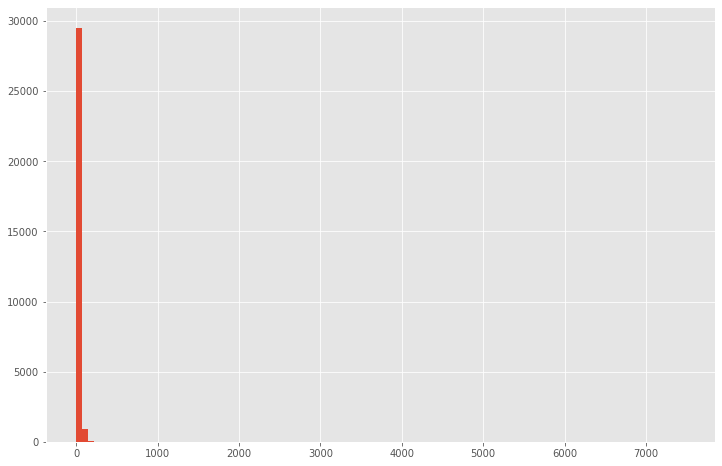

In [0]:
# histogram of life_sq.
df['life_sq'].hist(bins=100)

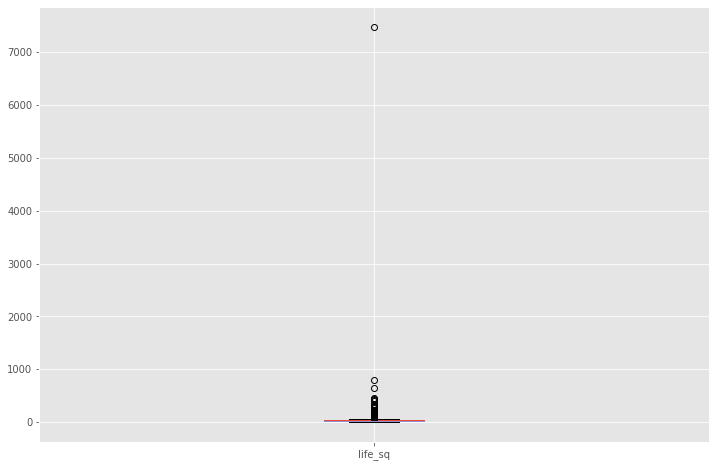

In [0]:
#To study the feature closer, let’s make a box plot.
# box plot.
df.boxplot(column=['life_sq'])

In this plot, we can see there is an outlier at a value of over 7000.


###Technique #2: Descriptive Statistics

In [0]:

df['life_sq'].describe()

count    30471.000000
mean        33.480883
std         46.522251
min          0.000000
25%         22.000000
50%         30.000000
75%         38.000000
max       7478.000000
Name: life_sq, dtype: float64

###Technique #3: Bar Chart

When the feature is categorical. We can use a bar chart to learn about its categories and distribution.
For example, the feature ecology has a reasonable distribution. But if there is a category with only one value called “other”, then that would be an outlier.

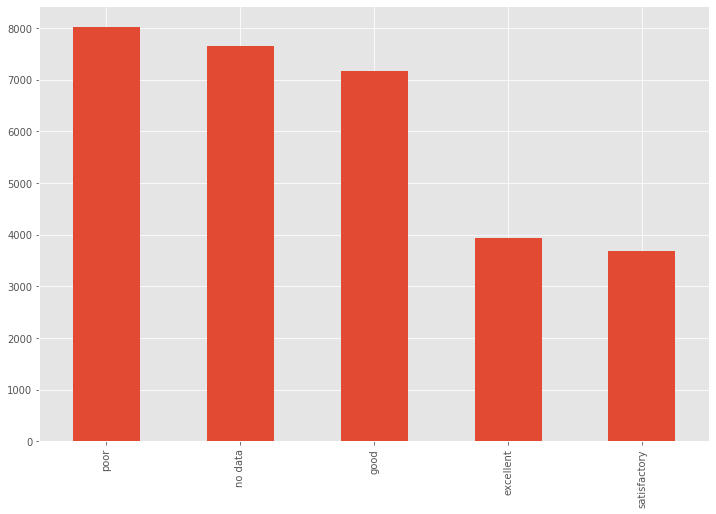

In [0]:
# bar chart -  distribution of a categorical variable
df['ecology'].value_counts().plot.bar()

Other Techniques: Many other techniques can spot outliers as well, such as scatter plot, z-score, and clustering. This article does not cover all of those.

What to do?

While outliers are not hard to detect, we have to determine the right solutions to handle them. It highly depends on the dataset and the goal of the project.
The methods of handling outliers are somewhat similar to missing data. We either drop or adjust or keep them. We can refer back to the missing data section for possible solutions.

##Unnecessary data
After all the hard work done for missing data and outliers, let’s look at unnecessary data, which is more straightforward.

All the data feeding into the model should serve the purpose of the project. The unnecessary data is when the data doesn’t add value. We cover three main types of unnecessary data due to different reasons.



###Unnecessary type #1: Uninformative / Repetitive: 

Sometimes one feature is uninformative because it has too many rows being the same value.

**How to find out?**

In [0]:
#We can create a list of features with a high percentage of the same value.
#For example, we specify below to show features with over 95% rows being the same value.
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.02858%
no     30175
yes      296
Name: oil_chemistry_raion, dtype: int64

railroad_terminal_raion: 96.27187%
no     29335
yes     1136
Name: railroad_terminal_raion, dtype: int64

nuclear_reactor_raion: 97.16780%
no     29608
yes      863
Name: nuclear_reactor_raion, dtype: int64

build_count_foam: 95.35624%
0.0     29056
1.0       969
11.0      262
2.0       184
Name: build_count_foam, dtype: int64

big_road1_1line: 97.43691%
no     29690
yes      781
Name: big_road1_1line, dtype: int64

railroad_1line: 97.06934%
no     29578
yes      893
Name: railroad_1line, dtype: int64

cafe_count_500_price_high: 97.25641%
0    29635
1      787
2       38
3       11
Name: cafe_count_500_price_high, dtype: int64

mosque_count_500: 99.51101%
0    30322
1      149
Name: mosque_count_500, dtype: int64

cafe_count_1000_price_high: 95.52689%
0    29108
1     1104
2      145
3       51
4       39
5       15
6        8
7        1
Name: cafe_count_1000_price_high, dtype: int64

mosq

**What to do?**

We need to understand the reasons behind the repetitive feature. When they are genuinely uninformative, we can toss them out.

###Unnecessary type #2: Irrelevant

Again, the data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve in the project, they are irrelevant.

**How to find out?**

We need to skim through the features to identify irrelevant ones.
For example, a feature recording the temperature in Toronto doesn’t provide any useful insights to predict Russian housing prices.
**What to do?**
When the features are not serving the project’s goal, we can remove them.

###Unnecessary type #3: Duplicates

The duplicate data is when copies of the same observation exist.

There are two main types of duplicate data.
Duplicates type #1: All Features based

 **How to find out?**

This duplicate happens when all the features’ values within the observations are the same. It is easy to find.
We first remove the unique identifier id in the dataset. Then we create a dataset called df_dedupped by dropping the duplicates. We compare the shapes of the two datasets (df and df_dedupped) to find out the number of duplicated rows.

In [0]:
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('id', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

(30471, 344)
(30461, 343)


####Duplicates type #2: Key Features based

**How to find out?**

Sometimes it is better to remove duplicate data based on a set of unique identifiers.
For example, the chances of two transactions happening at the same time, with the same square footage, the same price, and the same build year are close to zero.
We can set up a group of critical features as unique identifiers for transactions. We include timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc. We check if there are duplicates based on them.


In [0]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2012-10-22  61       30.0     18.0   1979.0      2.0       8248500      2
2014-12-17  62       30.0     9.0    1979.0      2.0       6552000      2
2014-01-22  46       28.0     1.0    1968.0      2.0       3000000      2
2013-04-03  42       30.0     2.0    1979.0      2.0       3444000      2
2013-09-23  85       30.0     14.0   1979.0      3.0       7725974      2
2012-08-27  59       30.0     6.0    1979.0      2.0       4506800      2
2014-04-15  134      134.0    1.0    0.0         3.0       5798496      2
2013-05-22  68       30.0     2.0    1979.0      2.0       5406690      2
2013-12-05  40       30.0     5.0    1979.0      1.0       4414080      2
2012-09-05  43       30.0     21.0   1979.0      2.0       6229540      2
2015-03-30  41       41.0     11.0   2016.0      1.0       4114580      2
2013-12-18  39       30.0     6.0    1979.0      1.0       3700946      2
2013-06-24  40       30.0     12.0   1979.0

There are 16 duplicates based on this set of key features.

**What to do?**

We can drop these duplicates based on the key features.


In [0]:
# drop duplicates based on an subset of variables.

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(30471, 344)
(30455, 344)


##Inconsistent data
It is also crucial to have the dataset follow specific standards to fit a model. We need to explore the data in different ways to find out the inconsistent data. Much of the time, it depends on observations and experience. There is no set code to run and fix them all.
Below we cover four inconsistent data types.

###Inconsistent type #1: Capitalization

Inconsistent usage of upper and lower cases in categorical values is a common mistake. It could cause issues since analyses in Python is case sensitive.

**How to find out?**

Let’s look at the sub_area feature.

In [0]:
df['sub_area'].value_counts(dropna=False)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Mihajlovo-Jarcevskoe       1
Poselenie Klenovskoe                 1
Name: sub_area, Length: 146, dtype: int64

But sometimes there is inconsistent capitalization usage within the same feature. The “Poselenie Sosenskoe” and “pOseleNie sosenskeo” could refer to the same area.

**What to do?**

To avoid this, we can put all letters to lower cases (or upper cases).

In [0]:
# make everything lower case.
df['sub_area_lower'] = df['sub_area'].str.lower()
df['sub_area_lower'].value_counts(dropna=False)

poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie kievskij                   2
poselenie shhapovskoe                2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: sub_area_lower, Length: 146, dtype: int64

###Inconsistent type #2: Formats
Another standardization we need to perform is the data formats. One example is to convert the feature from string to DateTime format.

**How to find out?**

The feature timestamp is in string format while it represents dates.

In [0]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,build_count_wood_ismissing,build_count_frame_ismissing,build_count_brick_ismissing,build_count_monolith_ismissing,build_count_panel_ismissing,build_count_foam_ismissing,build_count_slag_ismissing,build_count_mix_ismissing,raion_build_count_with_builddate_info_ismissing,build_count_before_1920_ismissing,build_count_1921-1945_ismissing,build_count_1946-1970_ismissing,build_count_1971-1995_ismissing,build_count_after_1995_ismissing,metro_min_walk_ismissing,metro_km_walk_ismissing,railroad_station_walk_km_ismissing,railroad_station_walk_min_ismissing,ID_railroad_station_walk_ismissing,cafe_sum_500_min_price_avg_ismissing,cafe_sum_500_max_price_avg_ismissing,cafe_avg_price_500_ismissing,cafe_sum_1000_min_price_avg_ismissing,cafe_sum_1000_max_price_avg_ismissing,cafe_avg_price_1000_ismissing,cafe_sum_1500_min_price_avg_ismissing,cafe_sum_1500_max_price_avg_ismissing,cafe_avg_price_1500_ismissing,cafe_sum_2000_min_price_avg_ismissing,cafe_sum_2000_max_price_avg_ismissing,cafe_avg_price_2000_ismissing,cafe_sum_3000_min_price_avg_ismissing,cafe_sum_3000_max_price_avg_ismissing,cafe_avg_price_3000_ismissing,prom_part_5000_ismissing,cafe_sum_5000_min_price_avg_ismissing,cafe_sum_5000_max_price_avg_ismissing,cafe_avg_price_5000_ismissing,num_missing,sub_area_lower
0,1,2011-08-20,43,27.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,9,bibirevo
1,2,2011-08-23,34,19.0,3.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,nagatinskij zaton
2,3,2011-08-27,43,29.0,2.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,tekstil'shhiki
3,4,2011-09-01,89,50.0,9.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,990.0,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,mitino
4,5,2011-09-05,77,77.0,4.0,12.0,1.0,1979.0,2.0,6.0,2.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

**What to do?**

We can convert it and extract the date or time values by using the code below. After this, it’s easier to analyze the transaction volume group by either year or month.

In [0]:
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['year'] = df['timestamp_dt'].dt.year
df['month'] = df['timestamp_dt'].dt.month
df['weekday'] = df['timestamp_dt'].dt.weekday

print(df['year'].value_counts(dropna=False))
print()
print(df['month'].value_counts(dropna=False))

2014    13662
2013     7978
2012     4839
2015     3239
2011      753
Name: year, dtype: int64

12    3400
4     3191
3     2972
11    2970
10    2736
6     2570
5     2496
9     2346
2     2275
7     1875
8     1831
1     1809
Name: month, dtype: int64


###Inconsistent type #3: Categorical Values

Inconsistent categorical values are the last inconsistent type we cover. A categorical feature has a limited number of values. Sometimes there may be other values due to reasons such as typos.

**How to find out?**

We need to observe the feature to find out this inconsistency. Let’s show this with an example.
We create a new dataset below since we don’t have such a problem in the real estate dataset. For instance, the value of city was typed by mistakes as “torontoo” and “tronto”. But they both refer to the correct value “toronto”.

A simple way to identify them is fuzzy logic (or edit distance). It measures how many letters (distance) we need to change the spelling of one value to match with another value.

We know that the categories should only have four values of “toronto”, “vancouver”, “montreal”, and “calgary”. We calculate the distance between all the values and the word “toronto” (and “vancouver”). We can see that the ones likely to be typos have a smaller distance with the correct word. Since they only differ by a couple of letters.

In [0]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


**What to do?**

We can set criteria to convert these typos to the correct values. For example, the below code sets all the values within 2 letters distance from “toronto” to be “toronto”.

In [0]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


###Inconsistent type #4: Addresses
The address feature could be a headache for many of us. Because people entering the data into the database often don’t follow a standard format.

**How to find out?**

We can find messy address data by looking at it. Even though sometimes we can’t spot any issues, we can still run code to standardize them.

There is no address column in our dataset for privacy reasons. So we create a new dataset df_add_ex with feature address.


In [0]:
# no address column in the housing dataset. So create one to show the code.
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


Address is usually very messy

**What to do?**

We run the below code to lowercase the letters, remove white space, delete periods and standardize wordings.


In [0]:
df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespace.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '') # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st') # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt') # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave') # replace apartment with apt.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave


It looks much better now 


---

